# The goal of this analysis is to understand customer behavior, product pricing,ratings, and discounts in the Amazon dataset to derive actionable insights. 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import pipeline

# Data oveview starts

In [2]:
data = pd.read_excel("amazon.csv.xlsx")
data

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,â‚¹399,"â‚¹1,099",0.64,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,â‚¹199,â‚¹349,0.43,4,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,â‚¹199,"â‚¹1,899",0.90,3.9,7928,ã€ Fast Charger& Data Syncã€‘-With built-in s...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,â‚¹329,â‚¹699,0.53,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,â‚¹154,â‚¹399,0.61,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,â‚¹379,â‚¹919,0.59,4,1090,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"â‚¹2,280","â‚¹3,045",0.25,4.1,4118,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentione

In [3]:
data.shape

(1465, 16)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   object 
 4   actual_price         1465 non-null   object 
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   object 
 7   rating_count         1463 non-null   object 
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [69]:
data.isnull().sum()
# no null value spotted

product_id             0
product_name           0
category               0
category_split         0
discounted_price       0
actual_price           0
discount               0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
Review_type            0
dtype: int64

In [6]:
data.describe()

,discount_percentage
count,1465.000000
mean,0.476915
std,0.216359
min,0.000000
25%,0.320000
50%,0.500000
75%,0.630000
max,0.940000


# Data overview finished

# Data cleaning Starts

In [7]:
def clean_numeric_column(col_name, dtype=int):
    data[col_name] = (
        data[col_name]
        .replace(r'\|', np.nan, regex=True) #converts | data to nan from the column
        .astype(str)
        .str.replace(r'[^\d.]', '', regex=True)  # remove commas, symbols
    )
    data[col_name] = pd.to_numeric(data[col_name], errors='coerce').astype(dtype, errors='ignore') #converts the column to numeric


In [ ]:
for col in ["discounted_price","actual_price","rating_count","rating"]:
    clean_numeric_column(col,int) 

In [70]:
def clean_null_values(col_name,d_type):
    data[col_name] = data[col_name].fillna(data[col_name].mean()) #fill the null value through the column mean value
    data[col_name] = data[col_name].astype(d_type) #convert the column name to int

In [71]:
for col in ["rating_count","rating"]:
    clean_null_values(col,int)
# clean_null_values("rating_count",int)
# clean_null_values("rating_count",int)

In [11]:

splits_col = data['category'].str.split('|') # Split the "category" column by "|""
first_category = splits_col.str[0] # Take the first part of each split

col_index = data.columns.get_loc('category') # Insert new column right after "category"
data.insert(col_index + 1, 'category_split', first_category)

In [12]:
# data.insert(5,"discount",)
discounts = data["actual_price"] - data["discounted_price"]  #actual discount
data.insert(6,"discount",discounts) #inserted discount to 5th col with value of actual discount(discounts)

# Data cleaning Finished

# EDA starts

In [13]:
data.head()

,product_id,product_name,category,category_split,discounted_price,actual_price,discount,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,399,1099,700,0.64,4,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,199,349,150,0.43,4,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,199,1899,1700,0.90,3,7928,ã€ Fast Charger& Data Syncã€‘-With built-in s...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,329,699,370,0.53,4,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,154,399,245,0.61,4,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


# Objective: To identify the highest and lowest performing product categories by sales volume.

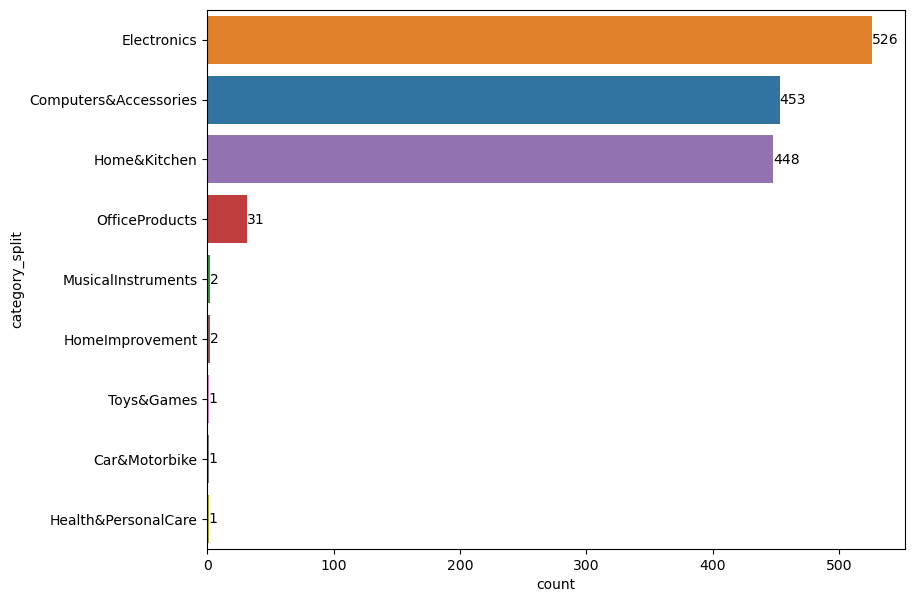

In [14]:
bar_colors = [
    "#1f77b4",  
    "#ff7f0e",  
    "#2ca02c",  
    "#d62728",  
    "#9467bd",  
    "#8c564b", 
    "#e377c2", 
    "#7f7f7f",
    "#bcbd22",
]
order = data["category_split"].value_counts().index

plt.figure(figsize=(9,7))
ax = sns.countplot(data=data,y="category_split",palette=bar_colors,hue="category_split",order=order)
for p in ax.patches:
    width = p.get_width()  
    y = p.get_y() + p.get_height() / 2  
    ax.text(width + 0.1, y, int(width), va='center') 

# Top Performing Category: Electronics (526 Sales)
# Electronics are high-demand utility goods. Customers rely on Amazon for "instant-need" items like chargers, cables, and gadgets due to competitive pricing and fast shipping. This category wins because it has the highest purchase frequency in the digital market.</h2>
# Lowest Performing Category: Health & Personal Care and others

# These are high-trust items. Shoppers typically prefer buying health and personal care products from specialized pharmacies or well-known physical retailers rather than general online listings, leading to lower conversion rates here.

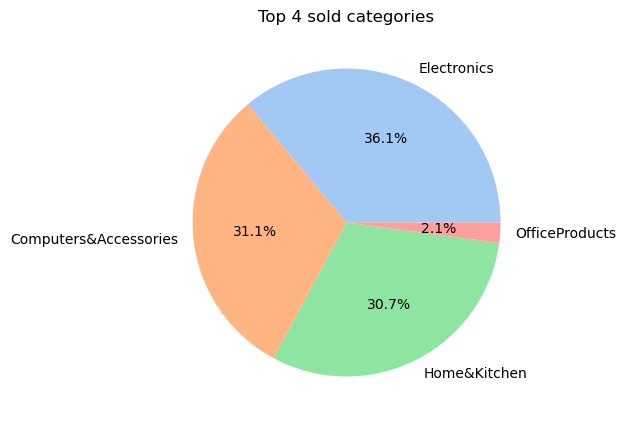

In [15]:
total_rows = len(data)
category_counts = data["category_split"].value_counts().head(4)
category_percent = category_counts * 100 / total_rows
colors = sns.color_palette('pastel')[0:len(data)]
plt.figure(figsize=(8,5))
plt.pie(category_percent.values, labels=category_percent.index, colors=colors, autopct='%1.1f%%')
plt.title("Top 4 sold categories")
plt.show()

# Objective: To investigate the relationship between product quality (Rating) and customer engagement (Rating Count)

<Axes: xlabel='rating', ylabel='rating_count'>

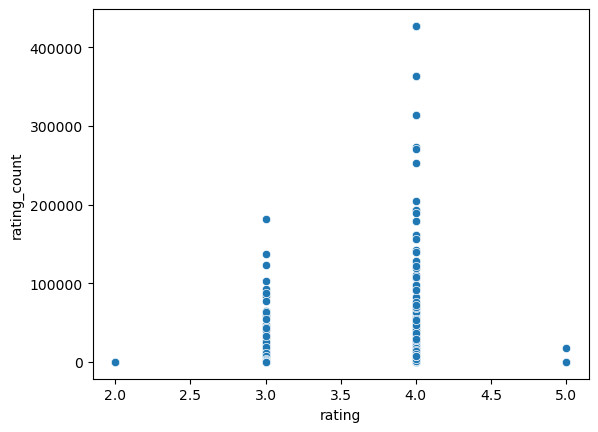

In [16]:
sns.scatterplot(x="rating",y="rating_count",data=data)

# The highest volume of engagement is concentrated around the 4.0 rating mark

# High rating counts at the 4.0 level suggest that volume is more important than a perfect score. Customers are more likely to buy a 4-star product with 100,000 reviews than a 5-star product with only 2 reviews.

<h1>Objective: To evaluate how discount rates are distributed across different product categories </h1>

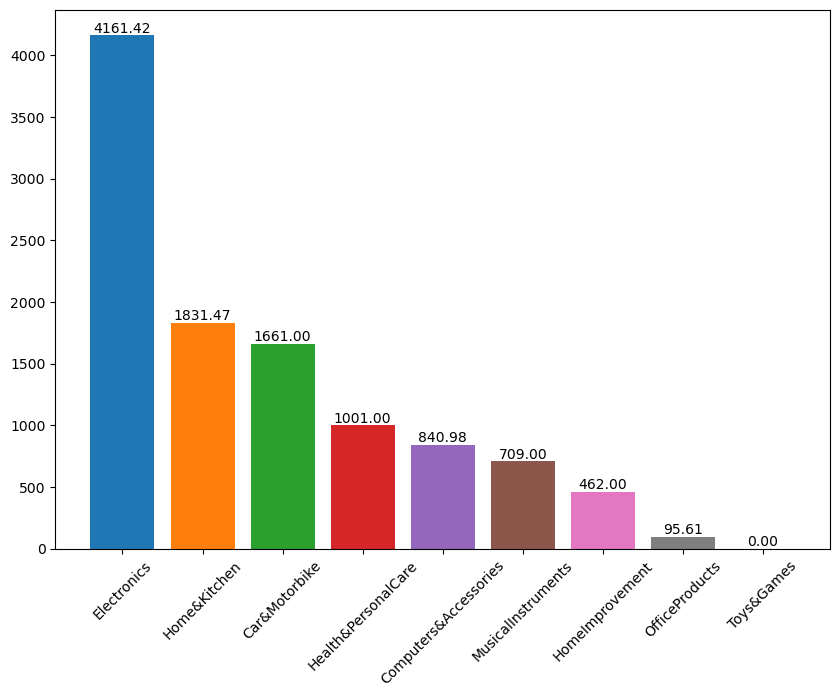

In [17]:
category_vs_discount = data.groupby("category_split")["discount"].mean().sort_values(ascending=False)
plt.figure(figsize=(10,7))
bars = plt.bar(x=category_vs_discount.index,height=category_vs_discount.values,color=bar_colors)
plt.xticks(rotation=45)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.2f}',   # format if needed
        ha='center',
        va='bottom'
   )

plt.show()

# The Electronics category leads with the highest average discount
# Amazon discounts Electronics heavily to attract millions of buyers, then earns profit by selling other higher-margin products along with them.

In [18]:
data.head(1)

,product_id,product_name,category,category_split,discounted_price,actual_price,discount,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories,399,1099,700,0.64,4,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...


In [19]:
user_category_counts = data.groupby(['category_split', 'user_id']).size() #grouped the data with category and user_id and count it repeat
user_category_counts = user_category_counts.reset_index(name='purchase_count')  
total_users = user_category_counts["user_id"].nunique() #Finds total unique users from user_category_counts
repeat_users = user_category_counts[user_category_counts["purchase_count"] >1]["user_id"].nunique() #Finds the data which have purchase count > 1 and unique user

overall_rpr = (repeat_users / total_users) * 100 # calculating the overall repeat..
print(f"Overall Repeat Purchase Rate: {overall_rpr:.2f}%")

Overall Repeat Purchase Rate: 11.98%


In [ ]:
category_rpr = user_category_counts.groupby('category_split').apply(
    lambda x: (x[x['purchase_count'] > 1]['user_id'].nunique() / x['user_id'].nunique()) * 100
).reset_index(name='repeat_purchase_rate').sort_values(by="repeat_purchase_rate",ascending=False)

print(category_rpr)

In [22]:
print(f"Highest repeat in category is {category_rpr['category_split'][0]} having repeat purchase {category_rpr['repeat_purchase_rate'][1]}")
print(f"Highest repeat in category is {category_rpr['category_split'][2]} having repeat purchase {category_rpr['repeat_purchase_rate'][2]}")

Highest repeat in category is Car&Motorbike having repeat purchase 20.43343653250774
Highest repeat in category is Electronics having repeat purchase 19.94818652849741


# Model

In [24]:
#use distilbert-base-uncased-finetuned-sst-2-english of positive and negative review
sentiment_model = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english"
)

Device set to use cpu


# This sentiment analysis is rule-based and may misclassify sarcasm,context-dependent phrases, or mixed emotions.

In [42]:
review_types = []

for title in data["review_title"].values:
    result = sentiment_model(title)[0]  ## use title because cpu is not capable of for longer review content encription
    review_types.append(result["label"])

data["Review_type"] = review_types #stores the reviews type to new column

print("Completed")


Completed


# To evaluate customer satisfaction and brand health by analyzing the ratio of positive to negative feedback 

In [67]:
category_vs_review_type= pd.crosstab(data["category_split"], data["Review_type"])

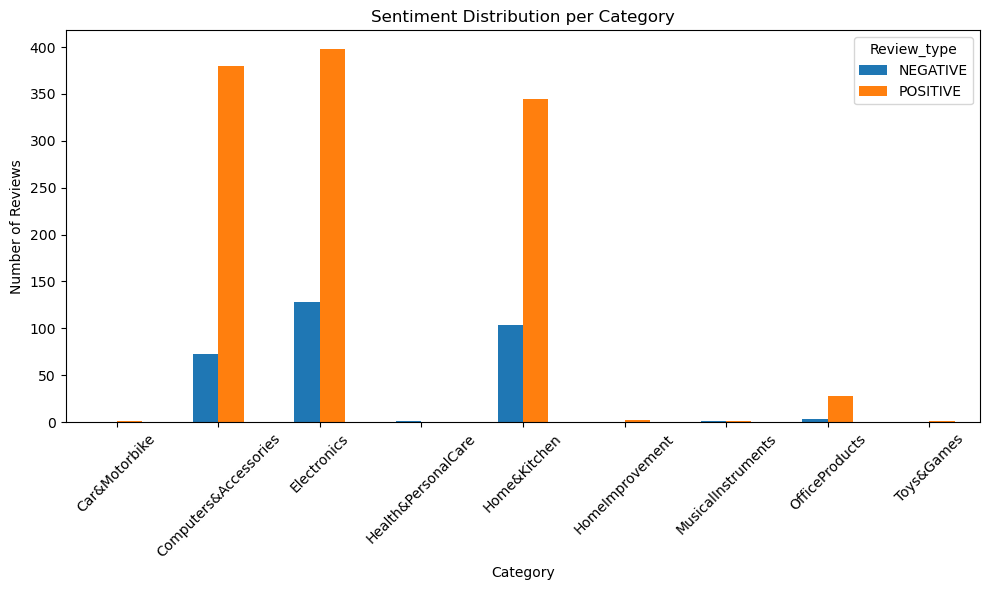

In [68]:
category_vs_review_type.plot(kind="bar", figsize=(10,6))
plt.title("Sentiment Distribution per Category")
plt.xlabel("Category")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Across high-volume categories like Electronics, Computers & Accessories, and Home & Kitchen, positive reviews significantly outweigh negative ones

# The ratio of positive-to-negative sentiment in core categories suggests that the products are meeting or exceeding customer expectations. This creates a "Trust Loop" where high ratings act as a powerful conversion tool for new shoppers.

## Final Insights

# Electronics is the most dominant product category on Amazon.
# Most Amazon products have ratings above 4, indicating high satisfaction.
# Higher discounts do not always guarantee higher ratings.
# Sentiment distribution varies across categories, reflecting differences in customer satisfaction.
# Products with more reviews tend to be more trusted.

